In [1]:
%load_ext autoreload
%autoreload 2
from vip_helpers import *
from state.extractStates import *
from utils.alignmentFunctions import *
from utils.lfpFunctions import *
from utils.readLFP import *

vip_data = load_vip_data()
days= vip_data['day']
animal='Back_left'
datapath = f'/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/{animal}/p13'
dataclasses, state_dfs, s2p_outs, recordings = load_data_for_day('p13')
spikes = [s2p_out.get_cell_spikes() for s2p_out in s2p_outs]
test_data, test_state_df, test_s2p_out, test_rec_name = dataclasses[0], state_dfs[0], s2p_outs[0], recordings[0]
test_motion = test_state_df['motion']
lfp = load_lfp(os.path.join(datapath, 'p13.lfp'))

/home/gianna/anaconda3/envs/vip_venv/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


Getting data for p13


In [2]:
lfp_path = os.path.join(datapath, 'p13.lfp')
load_lfp(lfp_path, num_channels=1)

array([-679, -673, -719, ...,  -43,  -31,  -42],
      shape=(1610280,), dtype=int16)

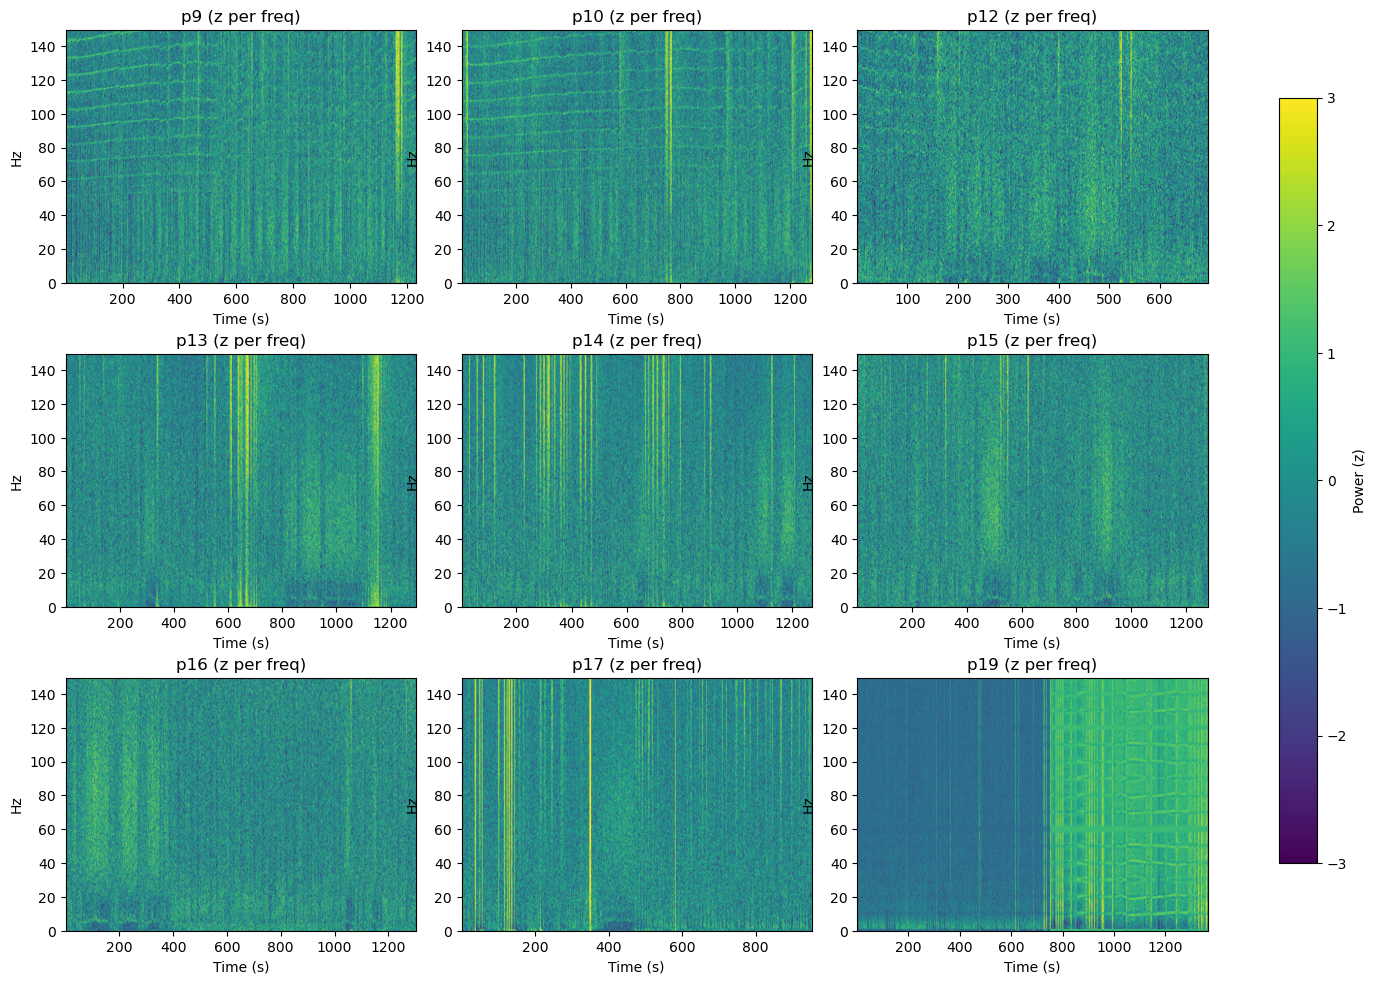

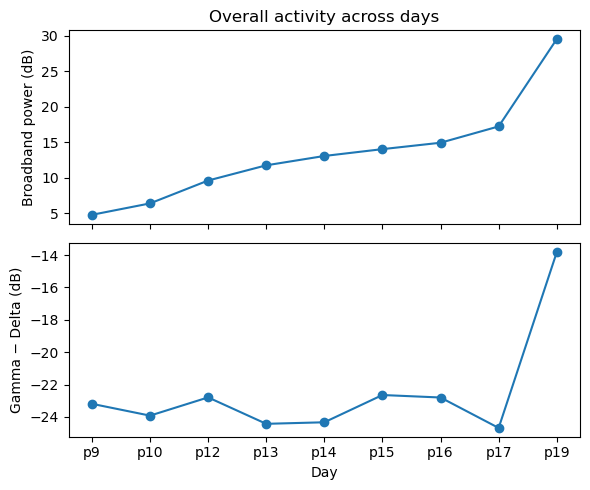

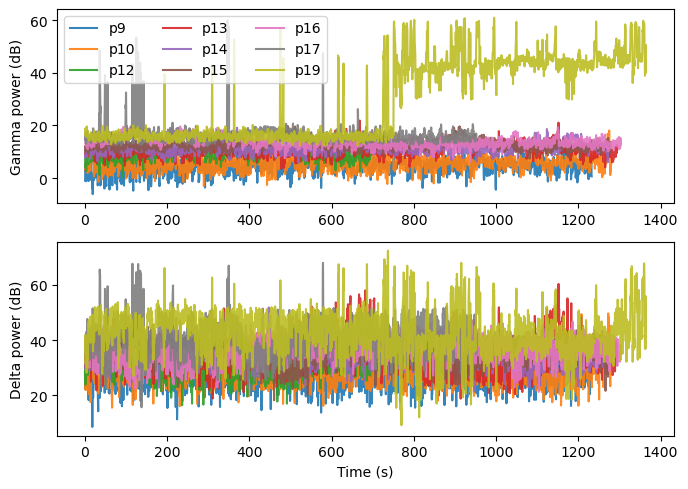

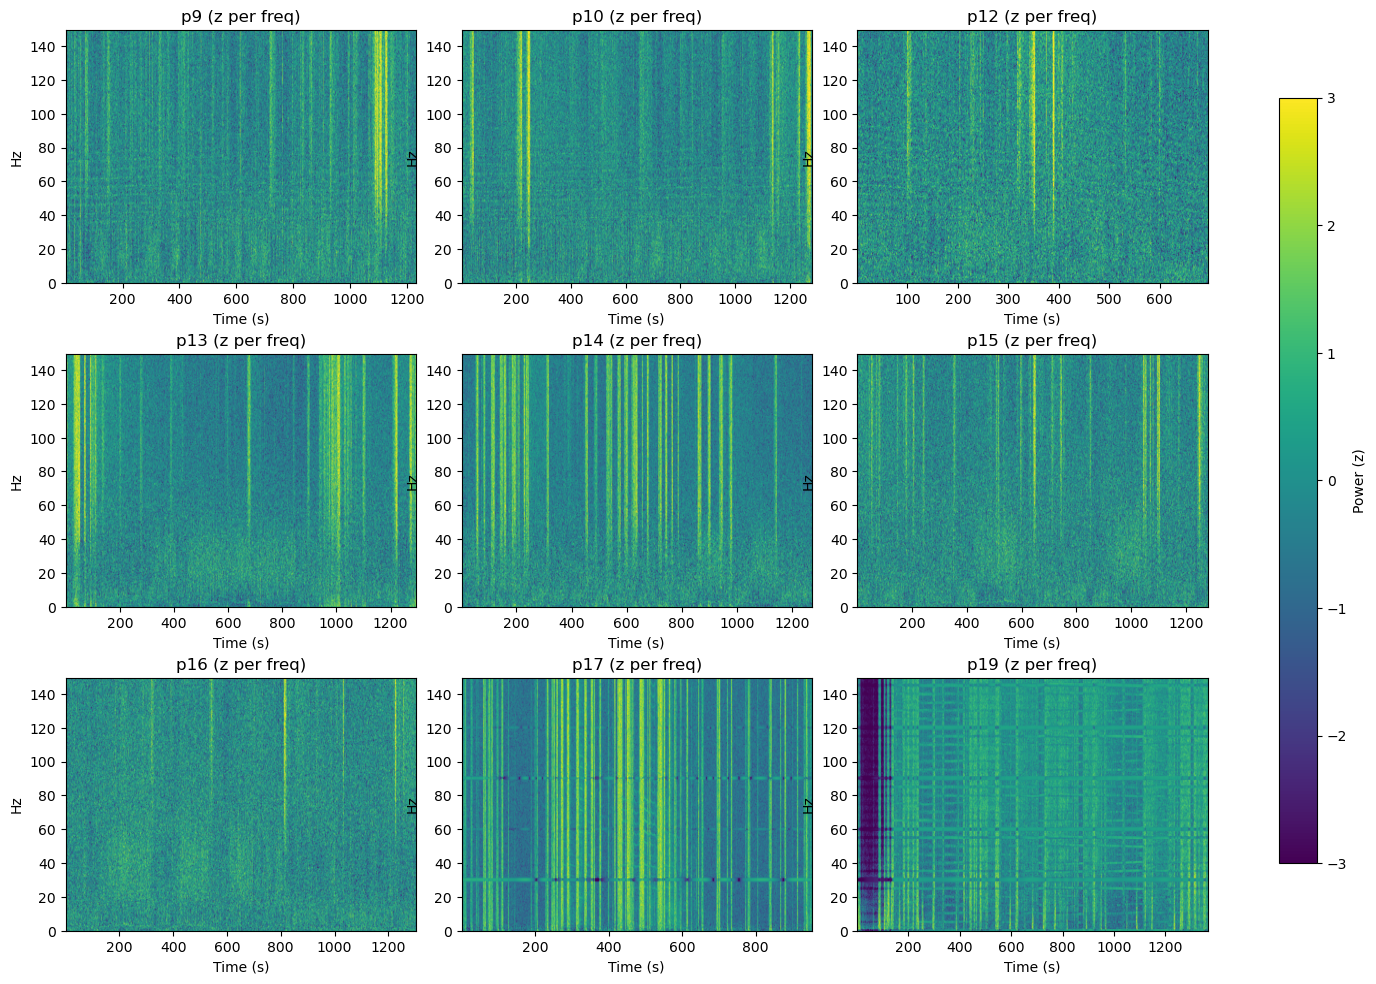

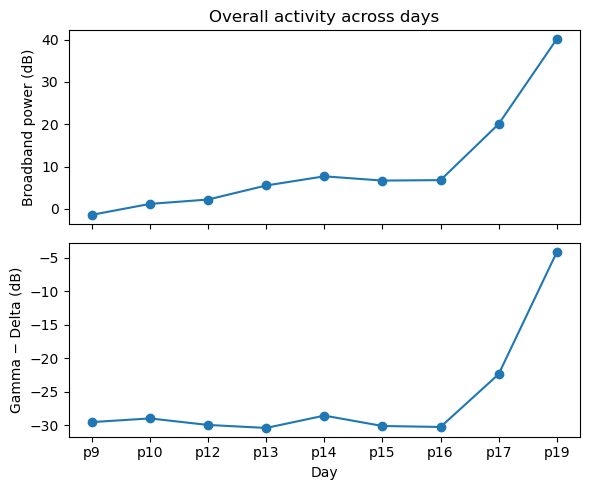

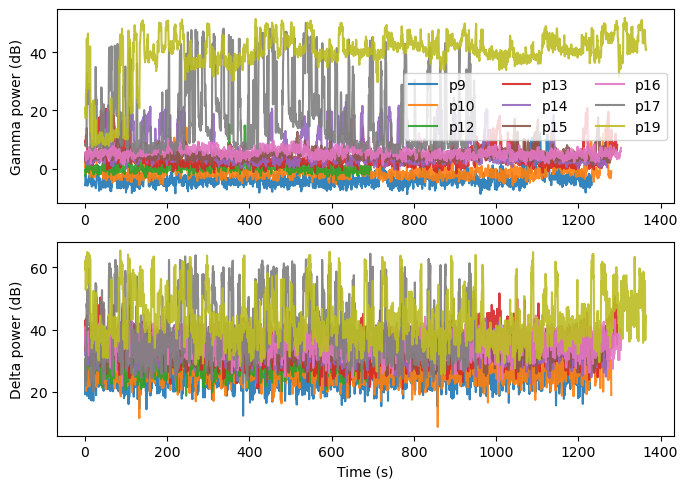

{'freqs': array([  0.        ,   0.61035156,   1.22070312,   1.83105469,
          2.44140625,   3.05175781,   3.66210938,   4.27246094,
          4.8828125 ,   5.49316406,   6.10351562,   6.71386719,
          7.32421875,   7.93457031,   8.54492188,   9.15527344,
          9.765625  ,  10.37597656,  10.98632812,  11.59667969,
         12.20703125,  12.81738281,  13.42773438,  14.03808594,
         14.6484375 ,  15.25878906,  15.86914062,  16.47949219,
         17.08984375,  17.70019531,  18.31054688,  18.92089844,
         19.53125   ,  20.14160156,  20.75195312,  21.36230469,
         21.97265625,  22.58300781,  23.19335938,  23.80371094,
         24.4140625 ,  25.02441406,  25.63476562,  26.24511719,
         26.85546875,  27.46582031,  28.07617188,  28.68652344,
         29.296875  ,  29.90722656,  30.51757812,  31.12792969,
         31.73828125,  32.34863281,  32.95898438,  33.56933594,
         34.1796875 ,  34.79003906,  35.40039062,  36.01074219,
         36.62109375,  37.23144

In [23]:
animal= 'Front_left'
day_spects = {}
day_spects_1 = {}
for day in days:
    try:
        rec_path = f'/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/{animal}/{day}'
        lfp_path = f'/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/{animal}/{day}/{day}.lfp'
        day_spects[day] = load_lfp(lfp_path, num_channels=1)
        #old_lfp_path = f'/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/{animal}/{day}/{day}.lfp'
        new_path = f'/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/{animal}/{day}/{day}_2channel.lfp'
        day_spects_1[day] = load_lfp(new_path, num_channels=2).T
        # if os.path.exists(old_lfp_path):
        #os.rename(old_lfp_path, new_path)
        #extract_lfp(rec_path, channels=[2], output_lfppath=lfp_path)
        #extract_lfp(rec_path, channels=[1, 2], output_lfppath=new_path)
    except:
        continue

compare_days_spectrograms(day_spects, fs_lfp=1250, fmax=150)
compare_days_spectrograms(day_spects_1, fs_lfp=1250, fmax=150)

In [16]:
from scipy.signal import coherence, resample_poly

# Resample to common fs (e.g., 200 Hz) for robust estimation
target_fs = 30
lfp_fs = 1250
lfp_rs = resample_poly(lfp.T, up=1, down=int(round(lfp_fs/target_fs)))
motion_rs = resample_poly(test_motion, up=target_fs, down=int(round(30.0)))  # from 30 Hz

f, Cxy = coherence(
    lfp_rs, motion_rs, fs=target_fs,
    nperseg=512, noverlap=384)
        # ~2.56 s windows at 200 Hz)
# Plot f vs Cxy; inspect peaks (e.g., 1–4 Hz, 6–12 Hz, 30–80 Hz)


/home/gianna/anaconda3/envs/vip_venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 512 is greater than input length  = 2, using nperseg = 2
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


ValueError: noverlap must be less than nperseg.

In [4]:
lfp = load_lfp( f'/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/Both_front/p13/p13.lfp')
freqs, times, spect_power = compute_power_spect_db(lfp, fs=1250)
#freqs

/home/gianna/Desktop/PythonProjects/VIPxTigerAnalyses/utils/lfpFunctions.py:84: UserWarning: nperseg = 2048 is greater than input length  = 2, using nperseg = 2
  freqs, times, power = spectrogram(


ValueError: noverlap must be less than nperseg.

Using nperseg=2, noverlap=0.65, signal_length=2


TypeError: Dimensions of C (1, 2, 471217) should be one smaller than X(471217) and Y(1) while using shading='flat' see help(pcolormesh)

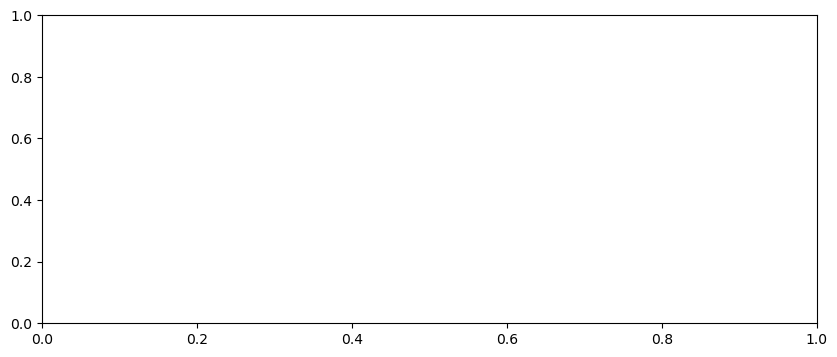

In [ ]:
days_lfp = {}
fs_lfp = 1250
days = vip_data['day']
animal = 'Both_front'
#days = [day for day in days if day != 'p12']
for day in days:
    lfp_path = f'/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/{animal}/{day}/{day}.lfp'
    if not os.path.exists(lfp_path):
        print(f'Could not find LFP path for {day}!')
        lfp_path = f'/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/{animal}/{day}/spon/spon.lfp'
    try:
        day_lfp = np.memmap(lfp_path,
                dtype=np.int16, mode='r')
        day_lfp = day_lfp.reshape(len(day_lfp) // 2, 2)
    except:
        traceback.print_exc()

f, t, Sdb = compute_power_spect_db(day_lfp.T, fs=1250, nperseg=2048, noverlap=0.65, fmax=200)
plt.figure(figsize=(10,4))
plt.pcolormesh(t, f, Sdb, shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('LFP Spectrogram (0–200 Hz)')
cbar = plt.colorbar()
cbar.set_label('Power (dB)')
plt.ylim(0, 200)  # extra guard in case you omit max_freq_hz
plt.tight_layout()
plt.show()
days_lfp[day] = day_lfp
#compare_days_spectrograms(days_lfp, fs_lfp, fmax=30)